In [1]:
import numpy as np
import pandas as pd
import sklearn

import os
import re
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
dir_ = "arXivMeta_completed/"

dfs = {}

# create dict of file-lists dfs = {'cs': [file1, ...], 'math': ..., etc.}
for file in os.listdir(dir_):
    info = re.search(r'arXivMeta_(.+?)_(.+?)\.(\w+?)', file)
    cat = info.group(1)
    date = info.group(2)
    print(f'{cat:>9}: {date}')
    
    file_path = os.path.join(dir_, file)
    
    if cat not in dfs:
        dfs[cat] = [file_path]
    else:
        dfs[cat].append(file_path)

# create dict of data_frames dfs = {'cs': pd.DataFrame(), 'math': ..., etc.}       
def getdf(file_list):
    cat_dfs = [pd.read_csv(file, delimiter='\t') for file in file_list]
    return pd.concat(cat_dfs)

dfs = {cat: getdf(cat_files) for (cat, cat_files) in dfs.items()}

       cs: from_2012-01-01_to_2014-12-31
       cs: from_2015-01-01_to_2015-12-31
       cs: from_2016-01-01_to_2016-12-31
     math: from_2012-01-01_to_2013-12-31
     math: from_2014-01-01_to_2014-12-31
     math: from_2015-01-01_to_2015-12-31
     math: from_2016-01-01_to_2016-07-01
     math: from_2016-07-02_to_2016-12-31
  physics: from_2012-01-01_to_2012-12-31
  physics: from_2013-01-01_to_2013-12-31
  physics: from_2014-01-01_to_2014-05-01
  physics: from_2014-05-02_to_2014-09-01
  physics: from_2014-09-02_to_2014-12-31
  physics: from_2015-01-01_to_2015-04-01
  physics: from_2015-04-02_to_2015-07-01
  physics: from_2015-07-02_to_2015-10-01
  physics: from_2015-10-02_to_2015-12-31
  physics: from_2016-01-01_to_2016-05-01
  physics: from_2016-05-02_to_2016-09-01
  physics: from_2016-09-02_to_2016-12-31
    q-bio: from_2012-01-01_to_2014-12-31
    q-bio: from_2015-01-01_to_2015-12-31
    q-bio: from_2016-01-01_to_2016-12-31
    q-fin: from_2012-01-01_to_2014-12-31
    q-fin: from_

In [3]:
# check if there are no duplicates (at least by 'id')

[(cat, 0 == len(df.id) - len(df.id.unique())) for (cat,df) in dfs.items()]

[('cs', True),
 ('math', True),
 ('physics', True),
 ('q-bio', True),
 ('q-fin', True),
 ('stat', True)]

In [4]:
# now we have for example

dfs['math'][:3]

,id,prim_cat,sec_cats,title,abstract
0,0704.0073,math,math.AG,A transcendental approach to Koll\'ar's inject...,We treat Koll\'ar's injectivity theorem from...
1,0704.0095,math,math.GR math.DG,Geometry of Locally Compact Groups of Polynomi...,We get asymptotics for the volume of large b...
2,0704.0273,math,math-ph math.GT math.MP,Dimers on surface graphs and spin structures. II,"In a previous paper, we showed how certain o..."


In [5]:
# get primary_categories (prim_cat) and text (title+abstract) only

def strip(df):
    df_2 = pd.concat([df.title + " " + df.abstract, df.prim_cat], axis=1)
    df_2.columns = ['text', 'label']
    return df_2

bare_dfs = {cat: strip(df) for (cat, df) in dfs.items()}

In [6]:
with pd.option_context('display.max_colwidth', 110):
    display(bare_dfs['math'][:3])

,text,label
0,A transcendental approach to Koll\'ar's injectivity theorem We treat Koll\'ar's injectivity theorem from...,math
1,Geometry of Locally Compact Groups of Polynomial Growth and Shape of\r\n Large Balls We get asymptotics...,math
2,"Dimers on surface graphs and spin structures. II In a previous paper, we showed how certain orientations...",math


,10E3 papers
categories,
cs,84.652
math,169.004
physics,376.203
q-bio,11.84
q-fin,4.019
stat,19.355


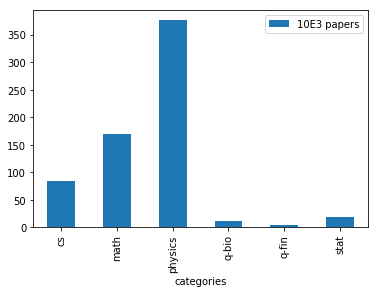

In [8]:
# plot the number of papers in each class

# the dataset is highly inbalanced, there's almost two orders of magnitude between the most and the least frequent class
# the world of quantative finance seems to be less keen on spending time writing papers than physicists

record_counts_tr = np.array([[cat, len(df)/1000] for (cat, df) in bare_dfs.items()]).transpose()
record_counts_df = pd.DataFrame({'categories': record_counts_tr[0], '10E3 papers': record_counts_tr[1]}).set_index('categories')
display(record_counts_df)

record_counts_df.astype('float').plot.bar()
plt.show()

In [6]:
ids_with_cats_ugly = df[['id', 'sec_cats']].set_index('id').sec_cats.str.split(expand=True).stack()
print(ids_with_cats_ugly[:10])

id_with_cats = pd.get_dummies(ids_with_cats_ugly).groupby(level=0).sum()
id_with_cats[:10]

id          
0704.1390  0              q-bio.CB
0704.2200  0              q-bio.MN
0704.2547  0              q-bio.BM
           1    cond-mat.stat-mech
0704.3005  0              q-bio.NC
           1       cond-mat.dis-nn
0704.3226  0              q-bio.QM
           1              q-bio.MN
0704.3321  0              q-bio.MN
0704.3724  0              q-bio.NC
dtype: object


,adap-org,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.SR,chao-dyn,cond-mat,cond-mat.dis-nn,cond-mat.mes-hall,...,q-bio.TO,q-fin.GN,q-fin.RM,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH
id,,,,,,,,,,,,,,,,,,,,,
0704.1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.2200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.2547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.3005,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0704.3226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.3321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.3724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0705.3869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0706.0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
len(id_with_cats.columns.unique())

124

In [30]:
# take care of adap-org (nlin.AO), chao-dyn(nlin.CD), patt-sol (nlin.PS)

for column in id_with_cats:
    print(column)

adap-org
astro-ph.CO
astro-ph.EP
astro-ph.GA
astro-ph.HE
astro-ph.SR
chao-dyn
cond-mat
cond-mat.dis-nn
cond-mat.mes-hall
cond-mat.mtrl-sci
cond-mat.other
cond-mat.quant-gas
cond-mat.soft
cond-mat.stat-mech
cs.AI
cs.AR
cs.CC
cs.CE
cs.CG
cs.CL
cs.CR
cs.CV
cs.CY
cs.DB
cs.DC
cs.DL
cs.DM
cs.DS
cs.ET
cs.FL
cs.GR
cs.GT
cs.HC
cs.IR
cs.IT
cs.LG
cs.LO
cs.MA
cs.MM
cs.MS
cs.NA
cs.NE
cs.OH
cs.PF
cs.PL
cs.RO
cs.SD
cs.SE
cs.SI
cs.SY
hep-lat
hep-ph
hep-th
math-ph
math.AC
math.AG
math.AP
math.AT
math.CA
math.CO
math.CT
math.DG
math.DS
math.FA
math.GT
math.HO
math.IT
math.LO
math.MG
math.MP
math.NA
math.OC
math.PR
math.RA
math.RT
math.SP
math.ST
nlin.AO
nlin.CD
nlin.CG
nlin.PS
nlin.SI
nucl-th
patt-sol
physics.ao-ph
physics.atm-clus
physics.atom-ph
physics.bio-ph
physics.chem-ph
physics.class-ph
physics.comp-ph
physics.data-an
physics.ed-ph
physics.flu-dyn
physics.gen-ph
physics.geo-ph
physics.hist-ph
physics.ins-det
physics.med-ph
physics.optics
physics.pop-ph
physics.soc-ph
physics.space-ph
q-bio
q-bio

In [111]:
full_df = pd.concat(bare_dfs.values())

In [83]:
bare_dfs['math'].text[30:40].str.replace(r'\$(.+)?\$', 'LATEX')

30    Gromov-Witten theory and Noether-Lefschetz the...
31    On Vojta's LATEX Conjecture   I gave a geometr...
32    The rate of convergence of Euler approximation...
33    Free Boolean algebras over unions of two well ...
34    Quantum cohomology of [C^N/\mu_r]   We give a ...
35    Asymptotics for Duration-Driven Long Range Dep...
36    The K(\pi, 1) problem for the affine Artin gro...
37    Quantisation commutes with reduction at discre...
38    (Co)cyclic (co)homology of bialgebroids: An ap...
39    On the Thermal Symmetry of the Markovian Maste...
Name: text, dtype: object

In [78]:
full_df.text[:10].str.replace(r'\$(.+)?\$', 'LATEX')

0    Geometric Complexity Theory V: On deciding non...
1    Hybrid-ARQ in Multihop Networks with Opportuni...
2    Preconditioned Temporal Difference Learning   ...
3    Optimum Linear LLR Calculation for Iterative D...
4    Compressed Regression   Recent research has st...
5    Multimedia Content Distribution in Hybrid Wire...
6    Tight Bounds on the Average Length, Entropy, a...
7    Word statistics in Blogs and RSS feeds: Toward...
8    Distributed Compression and Multiparty Squashe...
9    Using Data Compressors to Construct Rank Tests...
Name: text, dtype: object

In [84]:
import random

for df in bare_dfs.values():    
    for _ in range(2):
        print(df.text.iloc[random.choice(range(len(df)))])

VapeTracker: Tracking Vapor Consumption to Help E-cigarette Users Quit   Despite current controversy over e-cigarettes as a smoking cessation aid, we
present early work based on a web survey (N=249) that shows that some
e-cigarette users (46.2%) want to quit altogether, and that behavioral feedback
that can be tracked can fulfill that purpose. Based on our survey findings, we
designed VapeTracker, an early prototype that can attach to any e-cigarette
device to track vaping activity. We discuss our future research on vaping
cessation, addressing how to improve our VapeTracker prototype, ambient
feedback mechanisms, and the future inclusion of behavior change models to
support quitting e-cigarettes.

A note on distinct distances   We show that, for a constant-degree algebraic curve $\gamma$ in
$\mathbb{R}^D$, every set of $n$ points on $\gamma$ spans at least
$\Omega(n^{4/3})$ distinct distances, unless $\gamma$ is an {\it algebraic
helix} (see Definition 1.1). This improves the earlier 

In [164]:
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer(strip_accents='unicode',max_df=0.8)

In [165]:
df_sample = df.sample(frac=0.1)
len(df_sample)

37620

In [166]:
bag_of_words = count_v.fit_transform(df_sample.text)

In [167]:
words_count = bag_of_words.sum(axis=0)
words_count

matrix([[ 85, 413,  11, ...,   2,   3,   2]], dtype=int64)

In [168]:
count_word = sorted([(words_count[0, i], word) for word, i in count_v.vocabulary_.items()],reverse=True)
total_count = sum([item[0] for item in count_word])
word_freq = [(count/total_count, word) for (count, word) in count_word]
word_freq[:10]

[(0.017258922888233517, 'we'),
 (0.015725873839030707, 'is'),
 (0.013869095288673822, 'for'),
 (0.01280222530243179, 'with'),
 (0.011420850711357499, 'that'),
 (0.008731686167310872, 'are'),
 (0.008727395517858862, 'by'),
 (0.008521229811689832, 'on'),
 (0.006968443775007782, 'this'),
 (0.0066601606118809374, 'as')]

In [172]:
from collections import Counter
Counter(full_df.label)['physics'] / len(full_df)

0.5656567023469604